# Machine Learning Project : Association rules mining using Apriori algorithm.

## 1- Introduction

Association Rules is one of the very important concepts of machine learning being used in market basket analysis. In a store, all vegetables are placed in the same aisle, all dairy items are placed together and cosmetics form another set of such groups. Investing time and resources on deliberate product placements like this not only reduces a customer’s shopping time, but also reminds the customer of what relevant items (s)he might be interested in buying, thus helping stores cross-sell in the process. Association rules help uncover all such relationships between items from huge databases. One important thing to note is-
Rules do not extract an individual’s preference, rather find relationships between set of elements of every distinct transaction.

## 2- Dataset

We used the grocery dataset, which can be found on kaggle.
The dataset contains 9835 transactions by customers shopping for groceries. The data contains 169 unique items.

## 3- Approach

This kernel has 7 main sections :

1. Importing libraries
2. Reading the Datasert
3. Exploratory Data Analysis ;
4. Data Vizualisation ;
5. Data Preprocessing ;
6. Association rules ;
7. Conclusion.

### 1. Importing libraries :
  For basic operation, we need to use 2 libraries : Numpy and Pandas
  For vizualisation we need to use : matplotlib, seaborn, wordcloud ans squarify
  For preprocessing we need to use : TransactionEncoder
  For market basket analysis we need to use Mlxtend

### 2. Reading the dataset :

  To read our datasetWe, we will need to use the pd.read_csv method for 

### 3. Exploratory Data Analysis :
  To understand our dataset, we need to know  more about our dataset, so we going to kno about the shape of our dataset,     information about our dataset including the index dtype and columns, non-null values and memory usage, the number of       missing values in the dataset, the List unique values.
  
### 4. Datavizuamisation :
   For vizualisation, we use 4 method : 
   1. Data vizualisation by Wordcloud ;
   2. Data vizualisation by Bar graph ;
   3. Data vizualisation by Tree Map ;
   4. Data vizualisation by Networkx.
   
### 5. Data Preprocessing

 To know all the different products in the transactions, we must assign to each of them a list that contains a boolean   
 array where each index represents the corresponding product, whether it is purchased in the transaction or not. But first our dataset needs a preprocessing by converting into required format of TransactionEncoder.  So we need to :
 1. making each customers shopping items an identical list
 2. converting it into an numpy array
 3. checking the shape of the array

### 6. Association Rules

To solve this case study, we need to use the Apriori Algorithm, and we must explain the approach of the method.

Association rule is unsupervised learning where algorithm tries to learn without a teacher as data are not labelled. Association rule is descriptive not the predictive method, generally used to discover interesting relationship hidden in large datasets. The relationship are usually represented in form of rules or frequent itemsets.

#### Apriori Concept
Apriori is one of the algorithms that we can use for market basket analysis.

#### Apriori is based on 3 metrics:

a.Support

b.Confidence

c.Lift

##### a. Support :  
Quantify how many times an item or an itemset appear in a set of transactions. In other words, support quantifies the frequency of an itemset.

##### b. Confidence :
After buying an item X what’s the probability of buying item Y.

##### c. Lift :
What’s the probability to buy items X and Y together rather than just buying item X.

## 1. Importing  libraries

In [2]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud
import squarify

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## 2. Reading the dataset¶

In [4]:
data = pd.read_csv('groceries - groceries.csv')
data.head()

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Exploratory Data Analysis

In [5]:
data.shape

(9835, 33)

In [6]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 33 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Item(s)  9835 non-null   int64 
 1   Item 1   9835 non-null   object
 2   Item 2   7676 non-null   object
 3   Item 3   6033 non-null   object
 4   Item 4   4734 non-null   object
 5   Item 5   3729 non-null   object
 6   Item 6   2874 non-null   object
 7   Item 7   2229 non-null   object
 8   Item 8   1684 non-null   object
 9   Item 9   1246 non-null   object
 10  Item 10  896 non-null    object
 11  Item 11  650 non-null    object
 12  Item 12  468 non-null    object
 13  Item 13  351 non-null    object
 14  Item 14  273 non-null    object
 15  Item 15  196 non-null    object
 16  Item 16  141 non-null    object
 17  Item 17  95 non-null     object
 18  Item 18  66 non-null     object
 19  Item 19  52 non-null     object
 20  Item 20  38 non-null     object
 21  Item 21  29 non-null     object
 22  

Item(s)       0
Item 1        0
Item 2     2159
Item 3     3802
Item 4     5101
Item 5     6106
Item 6     6961
Item 7     7606
Item 8     8151
Item 9     8589
Item 10    8939
Item 11    9185
Item 12    9367
Item 13    9484
Item 14    9562
Item 15    9639
Item 16    9694
Item 17    9740
Item 18    9769
Item 19    9783
Item 20    9797
Item 21    9806
Item 22    9817
Item 23    9821
Item 24    9827
Item 25    9828
Item 26    9828
Item 27    9829
Item 28    9830
Item 29    9831
Item 30    9834
Item 31    9834
Item 32    9834
dtype: int64

In [7]:
data.sample(10)

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
8260,7,meat,butter,yogurt,rolls/buns,bottled water,soda,fruit/vegetable juice,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6246,5,whole milk,semi-finished bread,zwieback,soda,canned beer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9330,3,pork,whole milk,cake bar,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,13,frankfurter,herbs,yogurt,UHT-milk,mayonnaise,frozen vegetables,margarine,bottled water,soda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241,13,tropical fruit,berries,other vegetables,whole milk,yogurt,whipped/sour cream,frozen vegetables,coffee,bottled water,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,1,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4016,14,finished products,beef,citrus fruit,pip fruit,root vegetables,whole milk,semi-finished bread,potato products,rice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2800,2,canned beer,newspapers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
713,1,canned beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6316,2,bottled water,soda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_It1 = data['Item 1'].unique()
data_It2 = data['Item 2'].unique()
data_It3 = data['Item 3'].unique()

print('Unique Product in 1st Item is :', data_It1)
print('')
print('Unique Product in 2nd Item is :', data_It2)
print('')
print('Unique Product in 3rd Item is :', data_It3)

Unique Product in 1st Item is : ['citrus fruit' 'tropical fruit' 'whole milk' 'pip fruit'
 'other vegetables' 'rolls/buns' 'potted plants' 'beef' 'frankfurter'
 'chicken' 'butter' 'fruit/vegetable juice' 'packaged fruit/vegetables'
 'chocolate' 'specialty bar' 'butter milk' 'bottled water' 'yogurt'
 'sausage' 'brown bread' 'hamburger meat' 'root vegetables' 'pork'
 'pastry' 'canned beer' 'berries' 'coffee' 'misc. beverages' 'ham'
 'turkey' 'curd cheese' 'red/blush wine' 'frozen potato products' 'flour'
 'sugar' 'frozen meals' 'herbs' 'soda' 'detergent' 'grapes'
 'processed cheese' 'fish' 'sparkling wine' 'newspapers' 'curd' 'pasta'
 'popcorn' 'finished products' 'beverages' 'bottled beer' 'dessert'
 'dog food' 'specialty chocolate' 'condensed milk' 'cleaner' 'white wine'
 'meat' 'ice cream' 'hard cheese' 'cream cheese' 'liquor'
 'pickled vegetables' 'liquor (appetizer)' 'UHT-milk' 'candy' 'onions'
 'hair spray' 'photo/film' 'domestic eggs' 'margarine' 'shopping bags'
 'salt' 'oil' 'whi

In [9]:
y = data['Item 1'].value_counts().head(100).to_frame()
y.index

Index(['sausage', 'whole milk', 'frankfurter', 'tropical fruit',
       'other vegetables', 'citrus fruit', 'pork', 'rolls/buns', 'chicken',
       'canned beer', 'beef', 'soda', 'root vegetables', 'pip fruit', 'yogurt',
       'ham', 'bottled beer', 'meat', 'bottled water', 'hamburger meat',
       'pastry', 'berries', 'curd', 'ice cream', 'beverages', 'coffee',
       'whipped/sour cream', 'butter', 'dessert', 'onions', 'UHT-milk',
       'grapes', 'brown bread', 'newspapers', 'domestic eggs', 'frozen meals',
       'finished products', 'turkey', 'misc. beverages', 'shopping bags',
       'chocolate', 'butter milk', 'fruit/vegetable juice', 'salty snack',
       'liver loaf', 'cream cheese', 'frozen vegetables',
       'specialty chocolate', 'packaged fruit/vegetables', 'waffles', 'herbs',
       'oil', 'photo/film', 'white bread', 'chewing gum', 'white wine',
       'margarine', 'condensed milk', 'pet care', 'cat food', 'specialty bar',
       'sugar', 'hard cheese', 'napkins', 'fis

# 4. Data Vizualisation

# 1- Data vizualisation by Wordcloud

Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

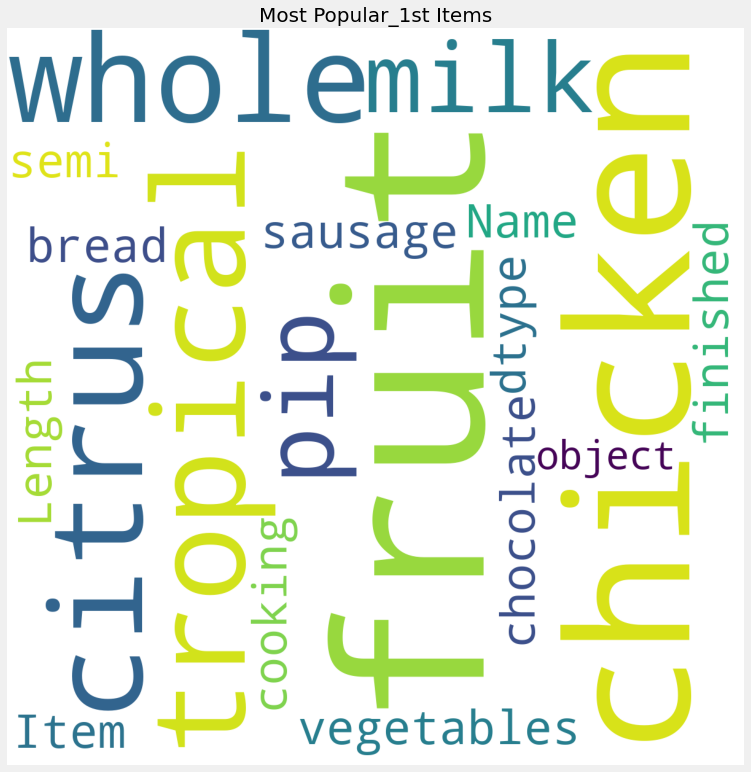

In [6]:
plt.rcParams['figure.figsize'] = (40, 40)

# 1st Item

plt.subplot2grid ((2,3),(0,0))

wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 50).generate(str(data['Item 1']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular_1st Items',fontsize = 20)
plt.show()

Whole Milk, tropical, fruit, citrus and chicken are more frequency in our dataset

# 2- Data vizualisation by Bar graph

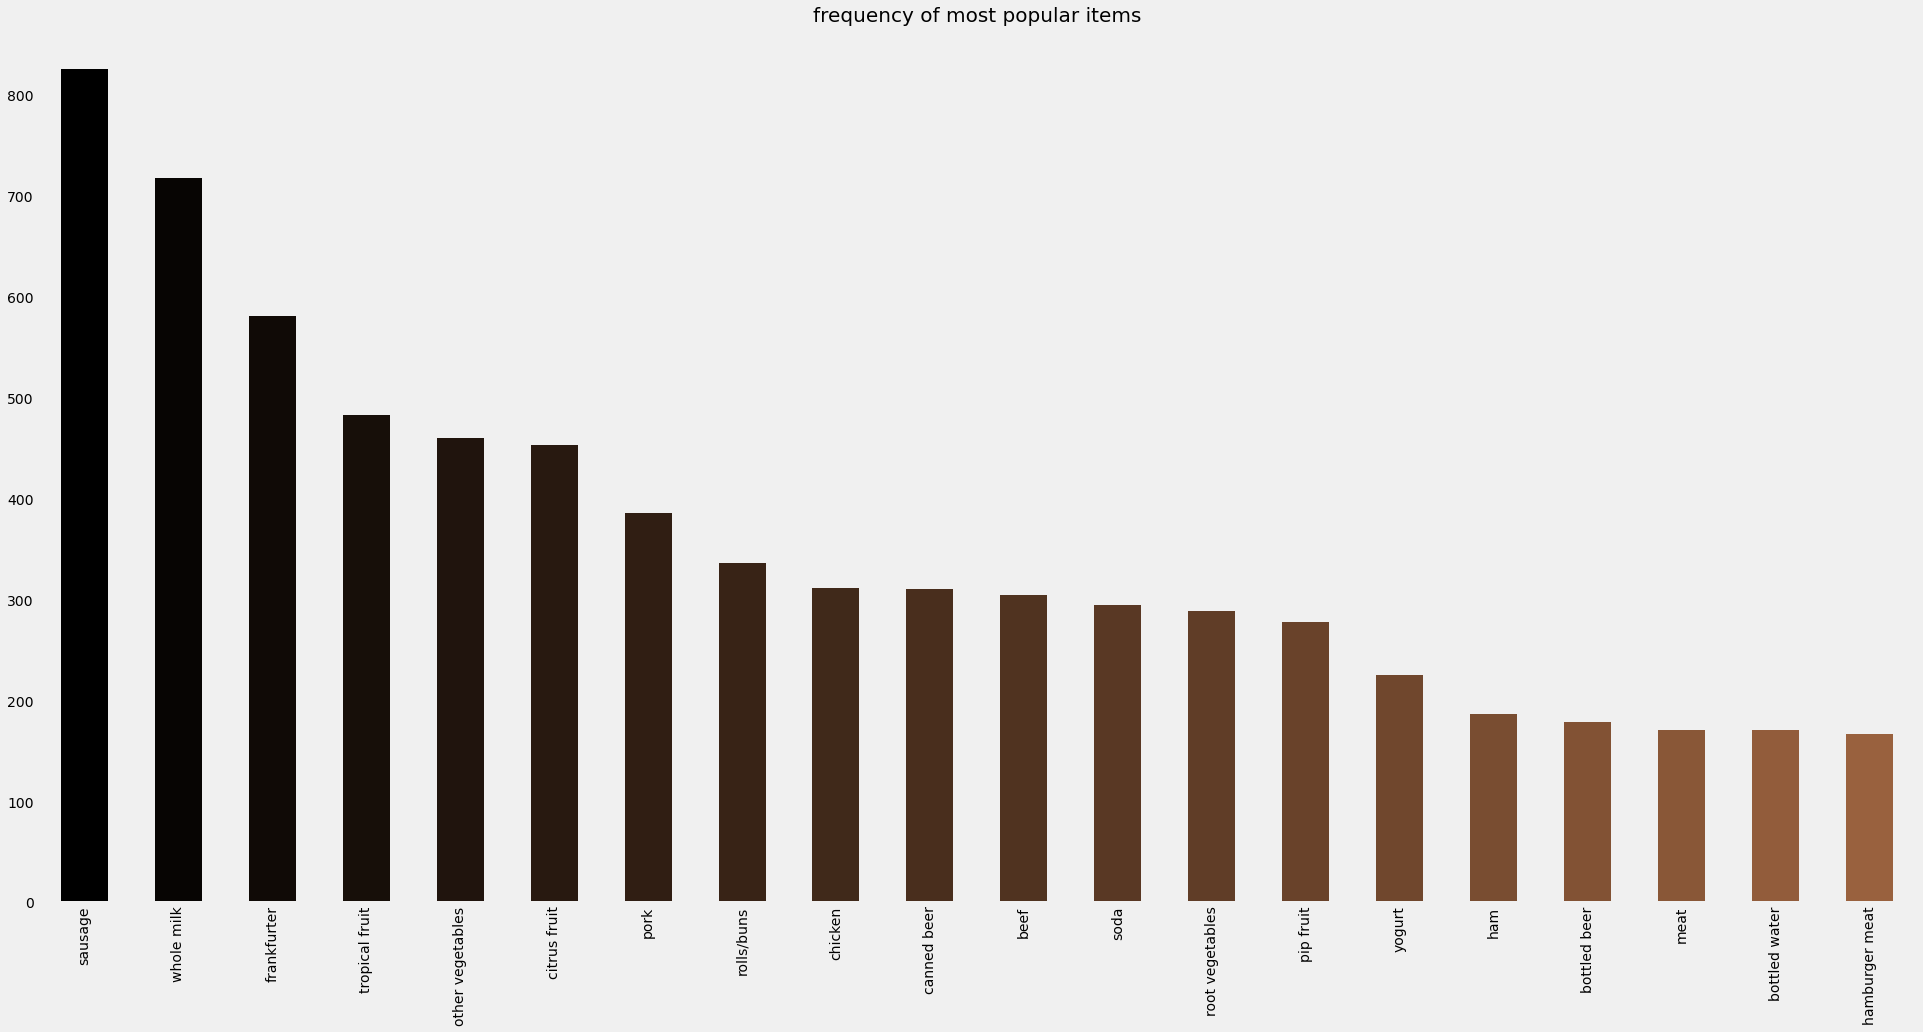

In [10]:
# looking at the frequency of most popular items

plt.rcParams['figure.figsize'] = (30, 15)
color = plt.cm.copper(np.linspace(0, 1, 40))
data['Item 1'].value_counts().head(20).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

We can find that sausage is the most purchased item from the Groceries, we may advice that sausage must be always in the stock not only that mostly we can see from the above graph what 20 items are being frequently purchased.

## 3- Data vizualisation by Tree Map

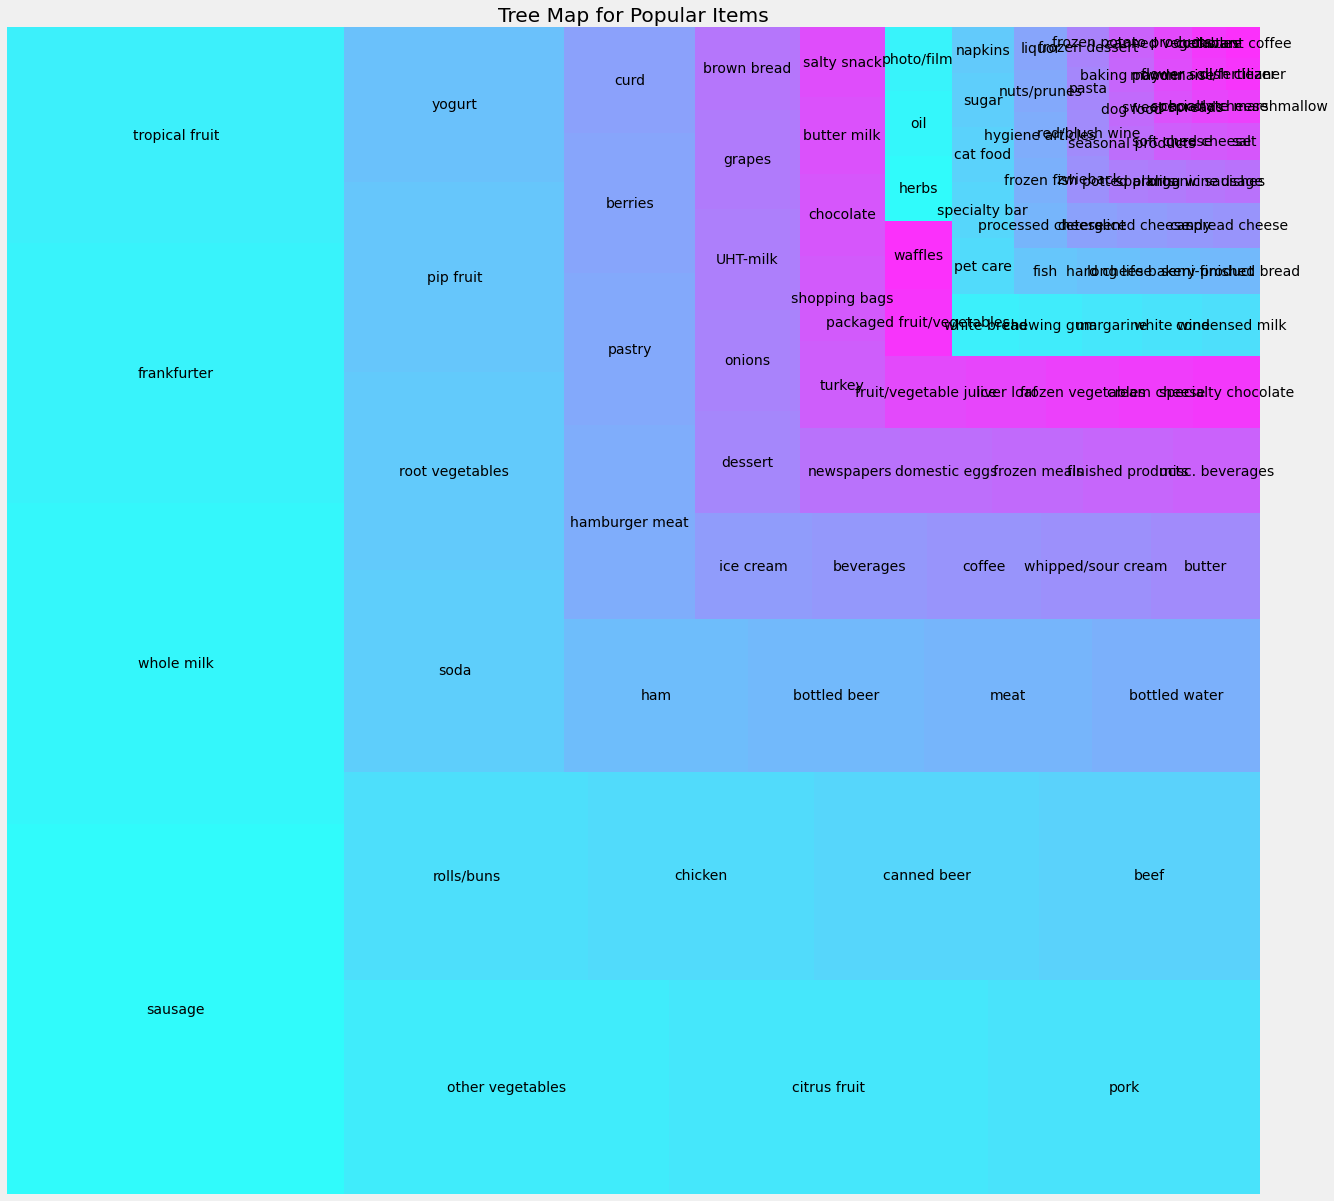

In [77]:
# plotting a tree map

plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

## 4- Data vizualisation by Networkx 

In [10]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)


import networkx as nx

food = nx.from_pandas_edgelist(food, source = 'food', target = 'Item 1', edge_attr = True)

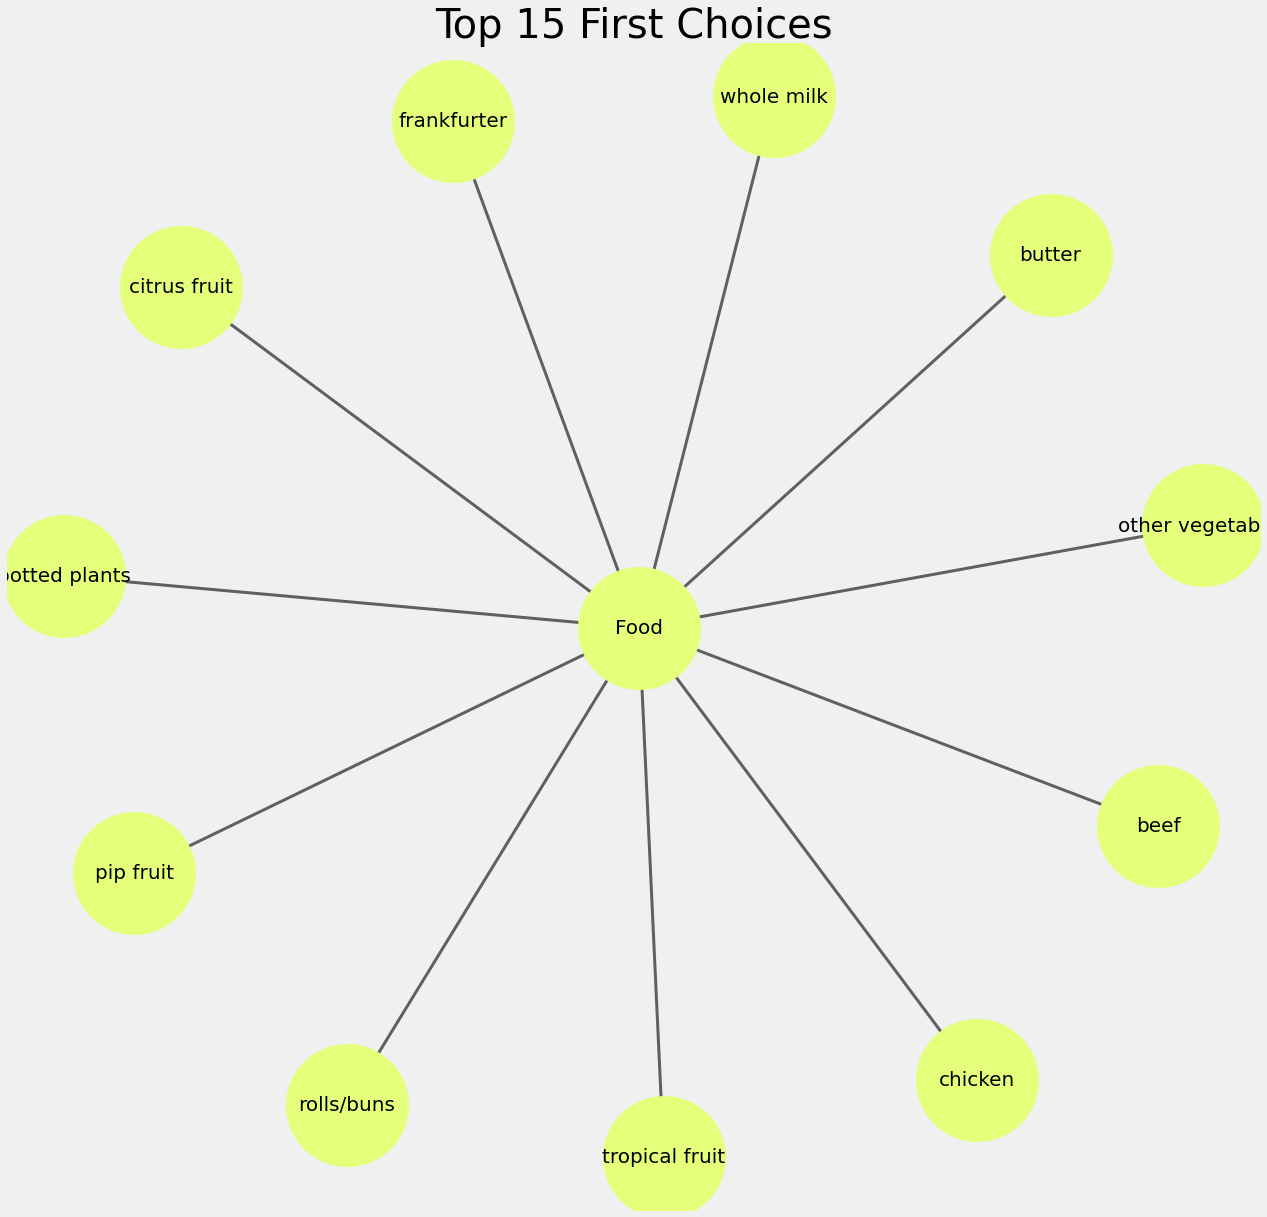

In [11]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
color = plt.cm.Wistia(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 40)
plt.show()

In [12]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 'Item 2', edge_attr = True)

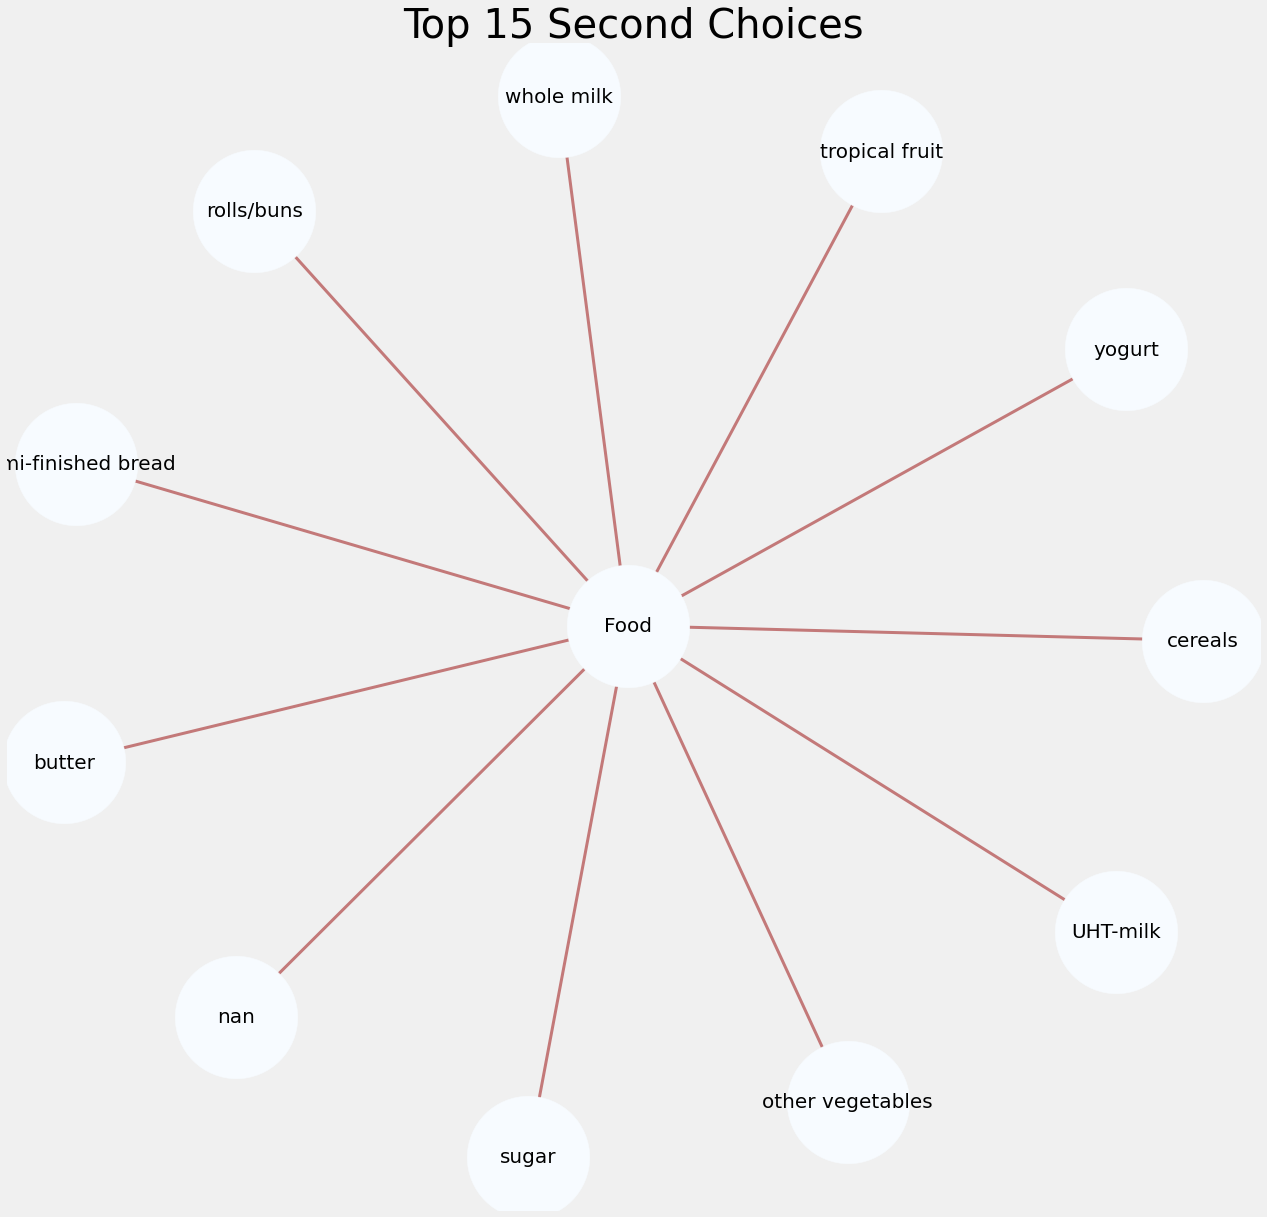

In [13]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Blues(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'brown')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second Choices', fontsize = 40)
plt.show()

In [14]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after = 15)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 'Item 3', edge_attr = True)

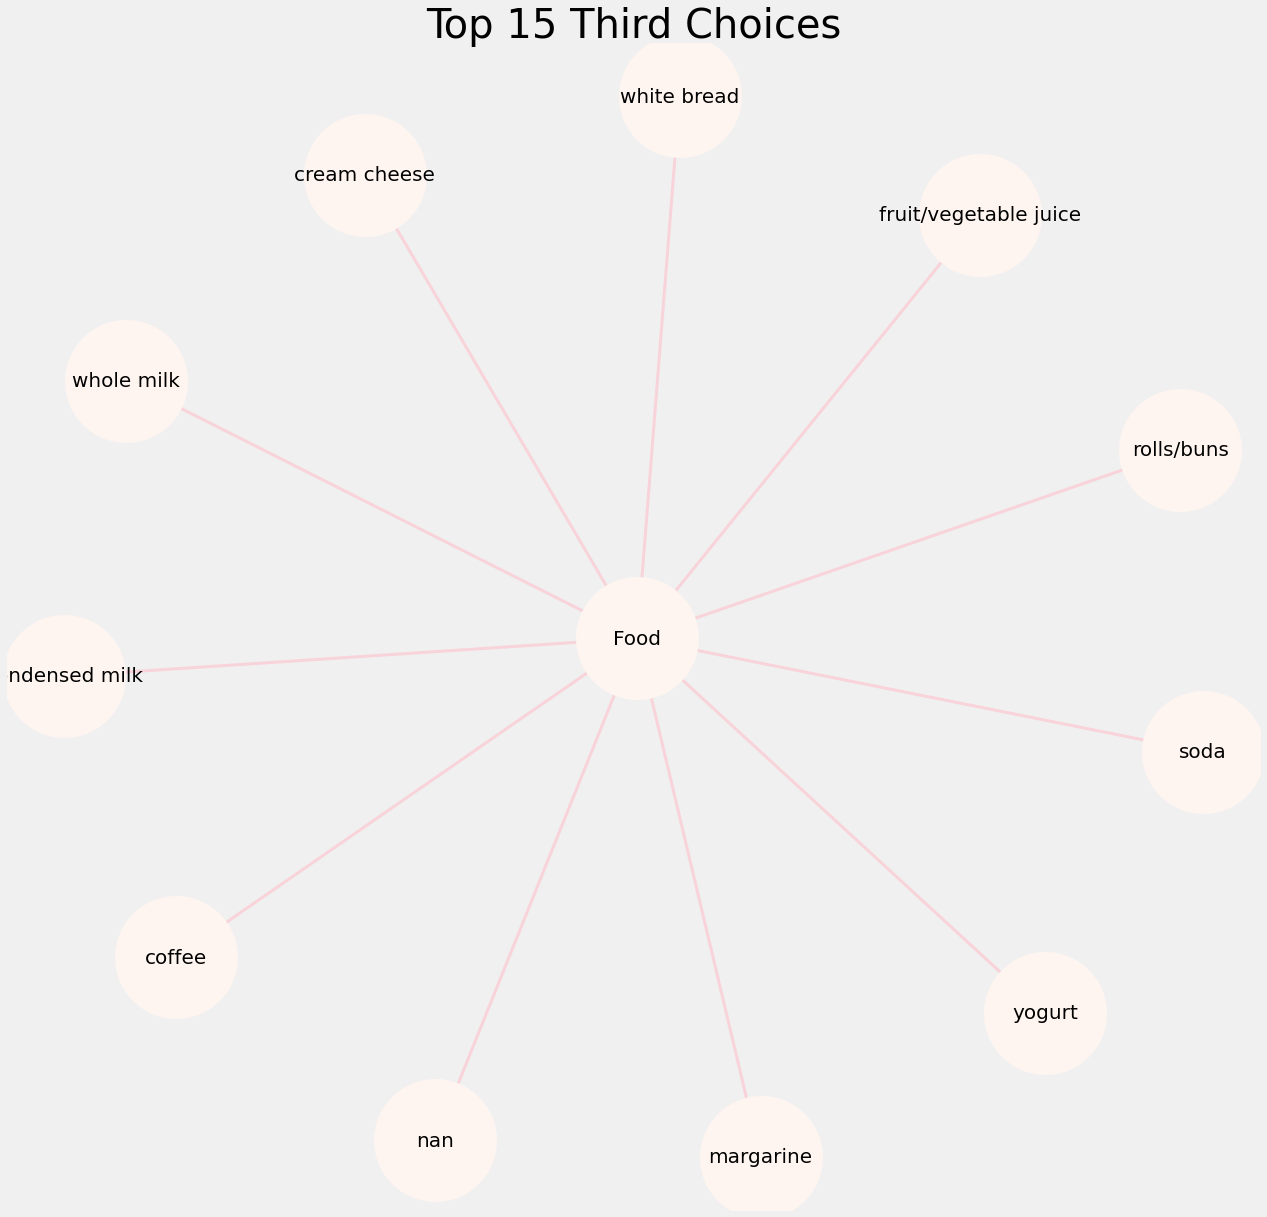

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
color = plt.cm.Reds(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(secondchoice, pos, width = 3, alpha = 0.6, edge_color = 'pink')
nx.draw_networkx_labels(secondchoice, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Third Choices', fontsize = 40)
plt.show()

# 5. Data Preprocessing

In [16]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 9835):
    trans.append([str(data.values[i,j]) for j in range(0, 33)])

# converting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(9835, 33)


# 6. Association Rules

## Apriori Preparation

In order to use apriori function, we need to transform our dataset into a one-hot-encoded Dataframe.

Transaction Encoder creates a Numpy array from a List and “One hot” encoded it but in True/False not in 0/1.

In [17]:
te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(9835, 199)

In [18]:
import warnings
warnings.filterwarnings('ignore')

#I'm going to use just 100 Items for my analysis

data = data.loc[:, ['sausage', 'whole milk', 'frankfurter', 'tropical fruit',
       'other vegetables', 'citrus fruit', 'pork', 'rolls/buns', 'chicken',
       'canned beer', 'beef', 'soda', 'root vegetables', 'pip fruit', 'yogurt',
       'ham', 'bottled beer', 'meat', 'bottled water', 'hamburger meat',
       'pastry', 'berries', 'curd', 'ice cream', 'beverages', 'coffee',
       'whipped/sour cream', 'butter', 'dessert', 'onions', 'UHT-milk',
       'grapes', 'brown bread', 'newspapers', 'domestic eggs', 'frozen meals',
       'finished products', 'misc. beverages', 'turkey', 'shopping bags',
       'chocolate', 'butter milk', 'salty snack', 'fruit/vegetable juice',
       'liver loaf', 'frozen vegetables', 'cream cheese',
       'specialty chocolate', 'packaged fruit/vegetables', 'waffles', 'herbs',
       'oil', 'photo/film', 'white bread', 'chewing gum', 'margarine',
       'white wine', 'condensed milk', 'pet care', 'specialty bar', 'cat food',
       'sugar', 'napkins', 'fish', 'hard cheese', 'long life bakery product',
       'semi-finished bread', 'processed cheese', 'frozen fish',
       'hygiene articles', 'nuts/prunes', 'liquor', 'detergent',
       'sliced cheese', 'candy', 'spread cheese', 'zwieback', 'red/blush wine',
       'pasta', 'frozen dessert', 'potted plants', 'sparkling wine',
       'organic sausage', 'dishes', 'seasonal products', 'dog food',
       'baking powder', 'frozen potato products', 'soft cheese', 'curd cheese',
       'salt', 'sweet spreads', 'mayonnaise', 'canned vegetables',
       'specialty cheese', 'chocolate marshmallow', 'flower soil/fertilizer',
       'cookware', 'dish cleaner', 'instant coffee']]

# checking the shape
data.shape

(9835, 100)

In [19]:
# let's check the columns

data.columns

Index(['sausage', 'whole milk', 'frankfurter', 'tropical fruit',
       'other vegetables', 'citrus fruit', 'pork', 'rolls/buns', 'chicken',
       'canned beer', 'beef', 'soda', 'root vegetables', 'pip fruit', 'yogurt',
       'ham', 'bottled beer', 'meat', 'bottled water', 'hamburger meat',
       'pastry', 'berries', 'curd', 'ice cream', 'beverages', 'coffee',
       'whipped/sour cream', 'butter', 'dessert', 'onions', 'UHT-milk',
       'grapes', 'brown bread', 'newspapers', 'domestic eggs', 'frozen meals',
       'finished products', 'misc. beverages', 'turkey', 'shopping bags',
       'chocolate', 'butter milk', 'salty snack', 'fruit/vegetable juice',
       'liver loaf', 'frozen vegetables', 'cream cheese',
       'specialty chocolate', 'packaged fruit/vegetables', 'waffles', 'herbs',
       'oil', 'photo/film', 'white bread', 'chewing gum', 'margarine',
       'white wine', 'condensed milk', 'pet care', 'specialty bar', 'cat food',
       'sugar', 'napkins', 'fish', 'hard chees

In [20]:
# getting the head of the data

data.head()

,sausage,whole milk,frankfurter,tropical fruit,other vegetables,citrus fruit,pork,rolls/buns,chicken,canned beer,...,salt,sweet spreads,mayonnaise,canned vegetables,specialty cheese,chocolate marshmallow,flower soil/fertilizer,cookware,dish cleaner,instant coffee
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## a- Support with column names

Let’s select itemsets with a minimum of 15% Support

In [41]:
from mlxtend.frequent_patterns import apriori

#Now, let us return the items and itemsets with at least 15% support:
apriori(data, min_support = 0.15, use_colnames = True)

,support,itemsets
0,0.255516,(whole milk)
1,0.193493,(other vegetables)
2,0.183935,(rolls/buns)
3,0.174377,(soda)


The whole milk appear more 25% in the dataset and the tropical fruit, other vegetables, rolls/buns and soda appears more 15% in our dataset.

## b- Confidence

In [33]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
2,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132


## c- Lift

In [58]:
from mlxtend.frequent_patterns import association_rules 
rules = association_rules(frequent_itemsets,metric="lift",min_threshold=1.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
2,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
3,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
4,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
5,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


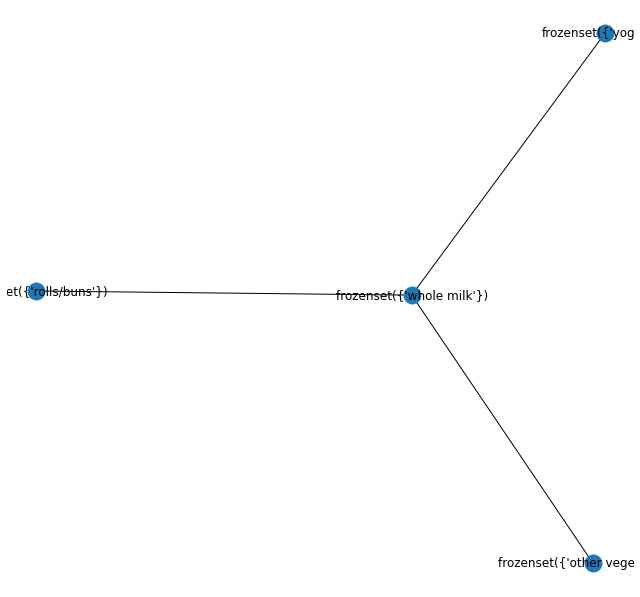

In [64]:
fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)
plt.show()

# 7. Conclusion

Whole milk is the bestseller of this groceries and it shows association with 3 items : other vegetables, rolls/buns and yogurt. There are a couple of strategies that the groceries can adopt (if it isn't using them yet) to increase its sales considering the association we have seen between Whole milk and its 3 partners.

Promotional discount in either one of the 3 partners can entice customers to buy Whole milk (or the other way round, will also work).
Placing these 3 items close to Whole milk ordering counter can be a good strategy to attract customers in buying these .
